In [17]:
path = '/content/drive/MyDrive/Animals'

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [19]:
os.listdir(path)

['Tiger', 'Lion', 'Leopard', 'Jaguar', 'Cheetah']

In [20]:
categories = os.listdir(path)
dataset=[]
for category in categories:
  data_path = os.path.join(path, category)
  for img in os.listdir(data_path):
     img_arr = cv2.imread(os.path.join(data_path, img), cv2.IMREAD_GRAYSCALE)
     img_arr = cv2.resize(img_arr, (200,200))
     dataset.append([img_arr, categories.index(category)])


In [21]:
len(dataset)

170

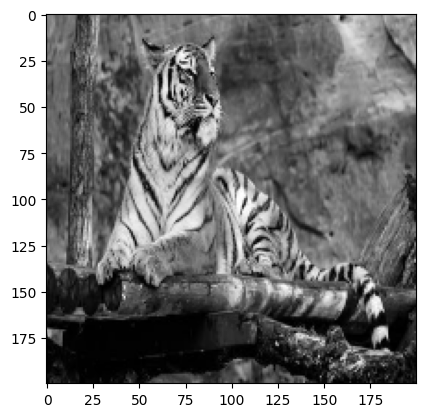

In [22]:
plt.imshow(dataset[0][0], cmap='gray')

In [23]:
import random
random.shuffle(dataset)

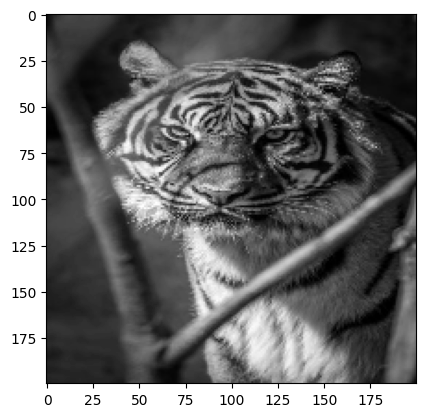

In [24]:
plt.imshow(dataset[0][0], cmap='gray')

In [25]:
folds=[]
start_index = 0
count = len(dataset)//5
for i in range(0,5):
  folds.append(dataset[start_index:count])
  start_index = count
  count+=34

In [26]:
print(len(folds))
print(len(folds[0]))

5
34


In [27]:
from collections import Counter


def mostCommonElement(lst,k):
  lst = [x[1] for x in lst]
  most_common_element = Counter(lst[0:k]).most_common(1)[0][0]
  return most_common_element

average_accuracies =[]
fold_accuracies=[]

for k in range(1,31):
  for i in range(0,5):
    prediction=[]
    valid_dataset = folds[i]
    train_dataset = [item for j in range(5) if j != i for item in folds[j]]
    for valid_rows in valid_dataset:
      distance_matrix=[]
      valid_img, valid_label = valid_rows[0], valid_rows[1]
      for train_rows in train_dataset:
        train_img, train_label = train_rows[0], train_rows[1]
        l2_distance = np.sqrt(np.sum(np.square(np.array(train_img)-np.array(valid_img))))
        distance_matrix.append([l2_distance, train_label])
      distance_matrix = sorted(distance_matrix)
      predicted_label = mostCommonElement(distance_matrix, k)
      if(valid_label==predicted_label):
        prediction.append(1)
      else:
        prediction.append(0)
    accuracy = sum(prediction)/len(prediction)
    fold_accuracies.append(accuracy)
  average_accuracies.append(sum(fold_accuracies)/len(fold_accuracies))

print(len(average_accuracies))
print(len(fold_accuracies))


30
150


In [28]:
average_accuracies = [round(num,2) for num in average_accuracies]
fold_accuracies = [round(num,2) for num in fold_accuracies]

for k, average_accuracy in enumerate(average_accuracies, start=1):
    print(f"For k={k} Average Accuracy={average_accuracy}")

For k=1 Average Accuracy=0.26
For k=2 Average Accuracy=0.26
For k=3 Average Accuracy=0.27
For k=4 Average Accuracy=0.28
For k=5 Average Accuracy=0.29
For k=6 Average Accuracy=0.29
For k=7 Average Accuracy=0.29
For k=8 Average Accuracy=0.29
For k=9 Average Accuracy=0.28
For k=10 Average Accuracy=0.28
For k=11 Average Accuracy=0.28
For k=12 Average Accuracy=0.28
For k=13 Average Accuracy=0.28
For k=14 Average Accuracy=0.28
For k=15 Average Accuracy=0.28
For k=16 Average Accuracy=0.28
For k=17 Average Accuracy=0.27
For k=18 Average Accuracy=0.27
For k=19 Average Accuracy=0.27
For k=20 Average Accuracy=0.27
For k=21 Average Accuracy=0.27
For k=22 Average Accuracy=0.27
For k=23 Average Accuracy=0.26
For k=24 Average Accuracy=0.26
For k=25 Average Accuracy=0.26
For k=26 Average Accuracy=0.26
For k=27 Average Accuracy=0.26
For k=28 Average Accuracy=0.26
For k=29 Average Accuracy=0.26
For k=30 Average Accuracy=0.26


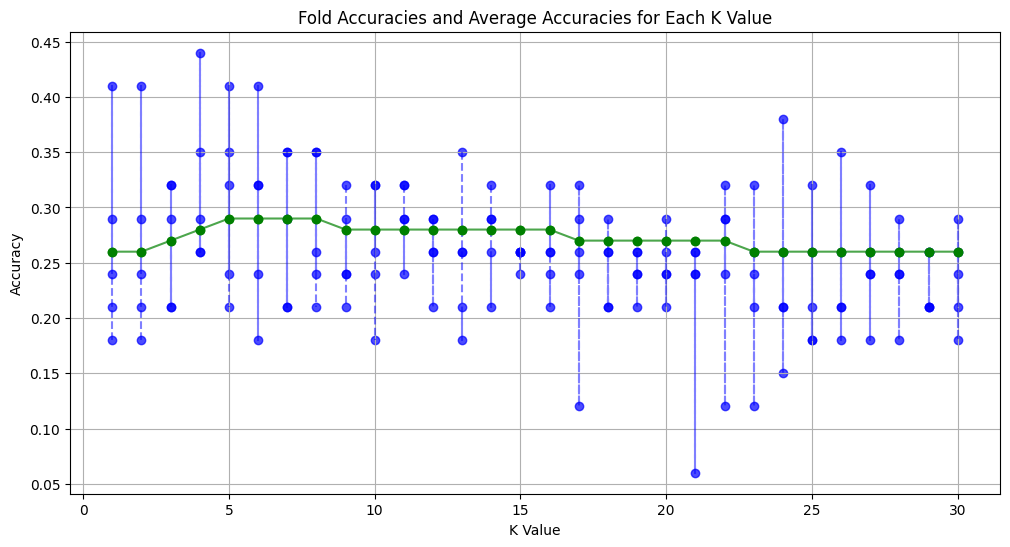

In [30]:
folds_per_k = 5
num_k_values = 30
plt.figure(figsize=(12, 6))

for k in range(num_k_values):
    start = k * folds_per_k
    end = start + folds_per_k
    plt.scatter([k + 1] * folds_per_k, fold_accuracies[start:end], color='blue', alpha=0.7)
    plt.plot([k + 1] * folds_per_k, fold_accuracies[start:end], linestyle='--', color='blue', alpha=0.5)

plt.plot(range(1, num_k_values + 1), average_accuracies, color='green', marker='o', label='Average Accuracy', alpha=0.7)
plt.scatter(range(1, num_k_values + 1), average_accuracies, color='green', zorder=10)

plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Fold Accuracies and Average Accuracies for Each K Value')
plt.grid(True)
plt.show()
